<a href="https://colab.research.google.com/github/AlcidesOxa/AlOXa/blob/master/Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression #Regresión logística
import scipy.stats as st
from sklearn.metrics import accuracy_score, roc_auc_score #Métricas para evaluar la clasificación
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict #herramientas para seleccionar modelos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
import warnings
warnings.filterwarnings('ignore') #para ignorar las advertencias

# Regresión Logística

Es un modelo estadístico que relaciona una variable dependiente discreta binaria con un conjunto de covariables tanto numéricas como categóricas. La variable objetivo es una dicotómica que toma los valores de 0 y 1, que denotan ausencia y presencia de un evento respectivamente. Las variables de atributos o características se denotan mediante el vector $x$ el cual incluye un uno para considerar también el sesgo.

La variable dependiente $y$ se considera aleatoria y que toma valores $1$ y $0$, la misma se distribuye como una Bernoulli, y se escribe $y\sim B(p)$, donde $p$ es la probabilidad de que $y=1$, y $0<p<1$. Su función de masa de probabilidad es
\begin{equation}
g\left( y\right) =\left\{
\begin{array}{cc}
p^{y}\left( 1-p\right) ^{1-y} & \text{si }y=0,1 \\
0 & \text{en otro caso}
\end{array}
\right .
\end{equation}
con media $E\left( y\right) =p$ y varianza $V\left( y\right) =p\left(
1-p\right) $.

Se establece que la variable $y$ es una manifestación de
una variable latente $y^{\ast }$, que (a diferencia de $y$) es una variable
continua. La variable dependiente $y$ se relaciona con la variable $y^{\ast }$ de la forma
\begin{equation}
y=\left\{
\begin{array}{cc}
1 & \text{si }y^{\ast }\geq 0 \\
0 & \text{si }y^{\ast }<0
\end{array}
\right.
\end{equation}
donde $y^{\ast }$ es continua y que depende linealmente de un vector de covariables $x$
\begin{equation*}
y^{\ast }=x^{\prime }\beta -u
\end{equation*}
y donde $\beta $ es un vector de parámetros y $u$ es un término de
error aleatorio.

Luego la probabilidad de $y=1$ es
\begin{eqnarray}
p=\Pr \left( y=1\right) =\Pr \left( y^{\ast }\geq 0\right)=\Pr \left( u\leq x^{\prime }\beta \right) =F\left( x^{\prime }\beta
\right)
\end{eqnarray}
es decir, $F$ es la función de distribución acumulativa de $u$
evaluada en $x^{\prime }\beta $. Por tanto se puede expresar la probabilidad
de un evento, como una función de distribución de probabilidad. En este sentido se pueden utilizar una variada cantidad de funciones de distribución que en la literatura estadística se tienen.

Si la distribucion de $u$ es logística entonces se tiene el
denominado modelo de regresión logística o modelo logit
\begin{equation}
p=\Lambda \left( x^{\prime }\beta \right) =\frac{e^{x^{\prime }\beta }}{
1+e^{x^{\prime }\beta }}
\end{equation}

Entonces se tiene que la variable dependiente $y$ sigue una distribución Bernoulli (que es un caso particular de la distribución binomial) con
probabilidad $F\left( x^{\prime }\beta \right) $ de que $y=1$.
\begin{equation}
g\left( y\right) =\left[ F\left( x^{\prime }\beta \right) \right] ^{y}\left[
1-F\left( x^{\prime }\beta \right) \right] ^{1-y}
\end{equation}
es decir, la probabilidad depende de las covariables $x$ a través de la función $F$.

**Estimación de los parámetros**

La estimación de los parámetros se realiza por el método de Máxima Verosimilitud. Sea $\left\{ y_{i}\right\} _{i=1}^{n}$ una muestra
aleatoria, sean los $x_{i}$ respectivos, y sea $y_{i}\sim B\left(
F_{i}\right) $ donde $F_{i}=F\left( x_{i}^{\prime }\beta \right) $, la función verosimilitud es el producto
\begin{equation*}
L\left( \beta \right) =\prod\limits_{i=1}^{n}F_{i}^{y_{i}}\left(
1-F_{i}\right) ^{1-y_{i}}
\end{equation*}
donde este producto se da por la independencia de las $y_{i}$. Aplicando logaritmos se tiene la función log-verosimilitud
\begin{equation}
\ln L\left( \beta \right) =\sum_{i=1}^{n}\left[ y_{i}\ln F_{i}+\left(
1-y_{i}\right) \ln \left( 1-F_{i}\right) \right]
\end{equation}
para hallar los valores de $\beta $ que hacen máxima la probabilidad de
observar la muestra observada, se procede a derivar con respecto a $\beta $. La condición de 1er orden es
\begin{equation}
\frac{\partial \ln L}{\partial \beta }=\sum_{i=1}^{n}\left[ \frac{y_{i}f_{i}
}{F_{i}}-\frac{\left( 1-y_{i}\right) f_{i}}{1-F_{i}}\right] x_{i}=0
\end{equation}
simplificando
\begin{equation}
\sum_{i=1}^{n}\left( y_{i}-\frac{e^{x_{i}^{\prime }\beta }}{
1+e^{x_{i}^{\prime }\beta }}\right) x_{i}=0
\end{equation}
dado que en la logística $f_{i}=\left( 1-F_{i}\right) F_{i}$. El hessiano es
\begin{eqnarray*}
H\left( \beta \right)  =\frac{\partial ^{2}\ln L}{\partial \beta \partial
\beta ^{\prime }}=-\sum_{i=1}^{n}f_{i}x_{i}x_{i}^{\prime } =-\sum_{i=1}^{n}\left( 1-F_{i}\right) F_{i}x_{i}x_{i}^{\prime }
\end{eqnarray*}
evaluada en la solución la matriz es definida negativa,
por tanto es un máximo.
La dificultad de hallar un $\beta $ solución analíticamente, requiere que se recurran a métodos numéricos. El método de Newton-Raphson es uno de ellos y consiste en iterar
\begin{eqnarray*}
\beta _{\left( j+1\right) }=\beta _{\left( j\right) }-\left[ H\left( \beta
_{\left( j\right) }\right) \right] ^{-1}g_{r}\left( \beta _{\left( j\right)
}\right)
\end{eqnarray*}
donde $g_{r}$ es el gradiente y $H$ el hessiano. Las iteraciones se realizan hasta que un criterio sobre $\left\Vert \beta
_{\left( j+1\right) }-\beta _{\left( j\right) }\right\Vert $ sea satisfecho
o se alcance un número máximo de iteraciones. El valor inicial $\beta _{\left( 0\right) }$ puede obtenerse a través de mínimos cuadrados ordinarios, regresando $y_{i}$ sobre $x_{i}$.

Gráfica de la función logística

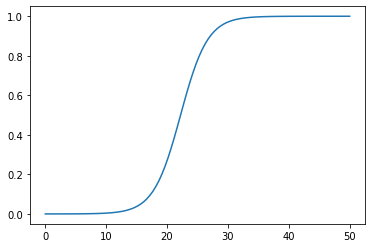

In [ ]:
n = 100
x = np.linspace(0, 50, n)
p = st.logistic.cdf(-10 + 0.45*x)
plt.plot(x, p)
plt.show()

Simulación de una variable bernoulli

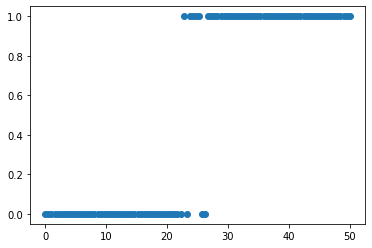

In [ ]:
y = np.random.binomial(1, p, n)
plt.scatter(x, y)
plt.show()

In [ ]:
x = x.reshape(-1, 1)
lr = LogisticRegression().fit(x, y)
yp = lr.predict(x)
print(accuracy_score(y, yp)) #precisión
pd.crosstab(y, yp)

0.96


col_0,0,1
row_0,,
0,46,2
1,2,50


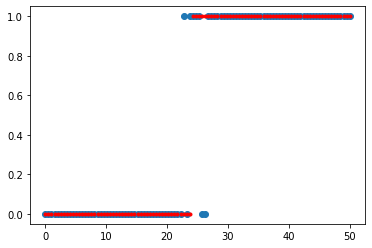

In [ ]:
plt.scatter(x, y)
plt.scatter(x, yp, c = 'red', marker='.')
plt.show()

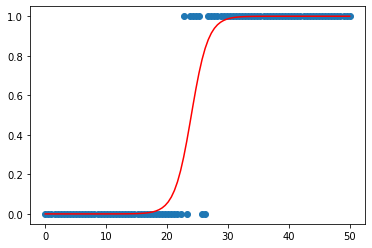

In [ ]:
ypr = lr.predict_proba(x)
plt.scatter(x, y)
plt.plot(x, ypr[:,1], c = 'red')
plt.show()

#Aplicación

Importar datos

In [ ]:
Datos = pd.read_csv('credito.csv')
Datos.head()

,monto,plazo,edad,sexo,sector,mora
0,60000,20,40,hombre,construcción,0
1,60000,20,59,hombre,comercio,0
2,50000,25,43,hombre,construcción,0
3,50000,17,28,hombre,construcción,0
4,20000,7,56,hombre,comercio,0


Formato

In [ ]:
Datos[['sexo', 'sector']] = Datos[['sexo', 'sector']].astype('category')

##Ajuste con dos variables independientes

Selección de variables dependiente e independientes

In [ ]:
X = Datos[['plazo', 'edad']]
Y = Datos.mora

Gráfico de los grupos

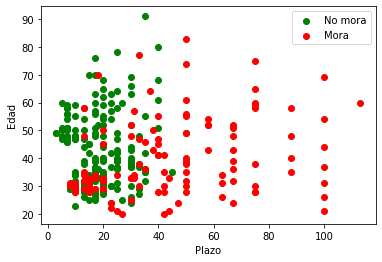

In [ ]:
plt.scatter(X.loc[Y == 0, 'plazo'], X.loc[Y == 0, 'edad'], c = 'green', label = 'No mora')
plt.scatter(X.loc[Y == 1, 'plazo'], X.loc[Y == 1, 'edad'], c = 'red', label = 'Mora')
plt.xlabel('Plazo')
plt.ylabel('Edad')
plt.legend()
plt.show()

In [ ]:
np.meshgrid([1, 2], [3, 4])

[array([[1, 2],
        [1, 2]]), array([[3, 3],
        [4, 4]])]

Función para graficar la clasificación del modelo y comparar con los datos observados

In [ ]:
def graf(X1, X2, Y, modelo):
  X1, X2 = np.array(X1), np.array(X2)
  Z1, Z2 = np.meshgrid(np.linspace(X1.min(), X1.max()),
                       np.linspace(X2.min(), X2.max()))
  Z = np.array([Z1.ravel(), Z2.ravel()]).T
  Ypr = modelo.predict(Z).reshape(Z1.shape) #reshape redimensiona a la dimensión de Z1
  plt.contourf(Z1, Z2, Ypr, alpha = 0.75,
               cmap = ListedColormap(('green', 'red')))
  plt.scatter(X1[Y == np.unique(Y)[0]], X2[Y == np.unique(Y)[0]],
              c = 'green', label = np.unique(Y)[0])
  plt.scatter(X1[Y == np.unique(Y)[1]], X2[Y == np.unique(Y)[1]],
              c = 'red', label = np.unique(Y)[1])
  plt.title('Clasificación')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()

Ajuste del modelo de regresión logística

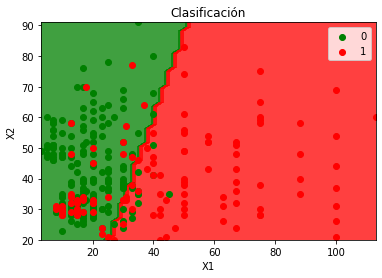

In [ ]:
modelo = LogisticRegression().fit(X,Y)
graf(X.iloc[:,0], X.iloc[:,1], Y, modelo)

## Ajuste con más de dos variables independientes

Selección de variables

In [ ]:
X = Datos.select_dtypes('number').drop('mora', axis=1)
D = pd.get_dummies(Datos.select_dtypes('category'), drop_first=True)
XD = pd.concat([D, X], axis=1)
Y = Datos.mora

Función para graficar la clasificación del modelo con más de dos variables independientes utilizando componentes principales, y comparar con los datos observados

In [ ]:
def grafv(X, Y, modelo):
  Z = StandardScaler().fit_transform(X)
  ACP = PCA(2).fit(Z)
  CP = ACP.fit_transform(Z)
  C1, C2 = np.meshgrid(np.linspace(CP[:,0].min(), CP[:,0].max()),
                       np.linspace(CP[:,1].min(), CP[:,1].max()))
  C = np.array([C1.ravel(), C2.ravel()]).T
  Xt = pd.DataFrame(C@ACP.components_, columns=X.columns.values)*X.std() + X.mean()
  Yp = modelo.predict(Xt).reshape(C1.shape)
  plt.contourf(C1, C2, Yp, alpha = 0.75,
              cmap = ListedColormap(('green', 'red')))
  plt.scatter(CP[Y == np.unique(Y)[0], 0], CP[Y == np.unique(Y)[0], 1],
              c = 'green', label = np.unique(Y)[0])
  plt.scatter(CP[Y == np.unique(Y)[1], 0], CP[Y == np.unique(Y)[1], 1],
              c = 'red', label = np.unique(Y)[1])
  plt.title('Clasificación')
  plt.xlabel('CP1')
  plt.ylabel('CP2')
  plt.legend()
  plt.show()

Ajuste del modelo de regresión logística

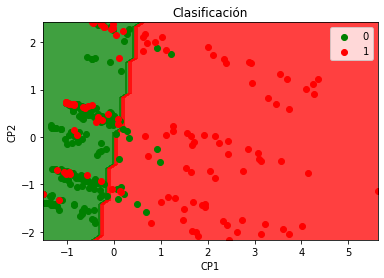

In [ ]:
modelov = LogisticRegression().fit(XD, Y)
grafv(XD, Y, modelov)

#Evaluación

Para evaluar la calidad de una clasificación binaria, se tienen varias métricas. Para explicarlas se parte de considerar que dada una variable binaria, es decir, dos categorías, que se denominarán: positivos ($P$) y negativos ($N$), y una variable de predicción cuyos valores son predicciones de positivos y de negativos, entonces se tiene que:

*   La cantidad de positivos correctamente predichos se denomina Verdaderos Positivos ($VP$)
*   La cantidad de negativos correctamente predichos se denomina Verdaderos Negativos ($VN$)
*   La cantidad de negativos incorrectamente predichos se denomina Falsos Positivos ($FP$)
*   La cantidad de positivos incorrectamente predichos se denomina Falsos Negativos ($FN$)

Luego el Total, los Positivos y los Negativos son respectivamante:
\begin{eqnarray*}
T &=&VP+VN+FP+FN \\
P &=&VP+FP \\
N &=&VN+FN
\end{eqnarray*}
Una de las medidas más utilizadas pero con importantes desventajas es la precisión o accuracy
\begin{eqnarray*}
A=\frac{VP+VN}{T}
\end{eqnarray*}
Esta medida es adecuada si los grupos originales tienen proporciones iguales o aproximadamente iguales, pero resulta engañoso en caso contrario.

Asimismo, se tiene la métrica $AUC$ que es el área bajo la curva denominada $ROC$, donde esta curva se grafica en el plano en el que las abscisas y las ordenadas varían de 0 a 1; un punto de la curva ROC es el par ($R,1-S$), donde $R$ es la Sensibilidad o Recall, definida como $R=\frac{VP}{VP+FN}$, y $S$ es la Especificidad, definida como $S=\frac{VN}{FP+VN}$, entonces el área bajo la curva $ROC$ es:
\begin{eqnarray*}
AUC=\int_{0}^{1}R\left( 1-S\right) d\left( 1-S\right)
\end{eqnarray*}
aquí $R\left( 1-S\right)$ se entiende al recall como función del complemento de la especificidad.



In [ ]:
Xent, Xval, Yent, Yval = train_test_split(XD, Y, test_size=0.25)

In [ ]:
Yvalp = LogisticRegression().fit(Xent, Yent).predict(Xval)
tc = pd.crosstab(Yval, Yvalp)
print('Precisión: ', np.trace(tc)/tc.sum().sum())
tc

Precisión:  0.8488372093023255


col_0,0,1
mora,,
0,57,1
1,12,16


In [ ]:
Ypr = cross_val_predict(LogisticRegression(), XD, Y, cv=5)
mc = pd.crosstab(Y, Ypr)
print('Precisión: ', np.trace(mc)/mc.sum().sum())
mc

Precisión:  0.8333333333333334


col_0,0,1
mora,,
0,216,7
1,50,69


In [ ]:
accs = cross_val_score(LogisticRegression(), XD, Y, cv=5)
print(accs)
print(accs.mean())

[0.85507246 0.85507246 0.80882353 0.82352941 0.82352941]
0.8332054560954816


In [ ]:
aucs = cross_val_score(LogisticRegression(), XD, Y, scoring='roc_auc', cv=5)
print(aucs)
print(aucs.mean())

[0.84583333 0.82731481 0.81449275 0.87121212 0.82670455]
0.8371115136876007
